# 나랑 닮은 꼴 연예인 찾기

In [74]:
import os
import face_recognition
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np


## Step1. 사진 모으기
내 사진은 2장 이상 포함하며,
연예인 사진을 최대한 많이 모으기

file_list: ['채연.jpg', '최무성.jpg', '이연걸.jpeg', '온앤오프효진.jpg', '최준석.jpg', '설리.jpeg', '효정.jpg', '피어스 브로스넌.jpg', '민니.jpg', '김희철.jpg', '김영삼.jpeg', '김남주.jpeg', '한기범.jpg', '첸.jpg', '방시혁.jpeg', '류현진.jpg', '기성용.jpg', '곽도원.jpg', '미미.jpg', '여자아이들수진.jpeg', '리사.jpg', '러블리즈지수.jpeg', '유지태.jpg', '온앤오프와이엇.jpg', '로제.jpg', '온앤오프라운.jpg', '존 파브르.jpeg', '크리스 에반스.jpg', '이광수.jpg', 'bush.jpeg', '잭 스페이더.jpeg', '김연우.jpeg', '슈가.jpg', '박찬호.jpg', '다니엘 크레이그.jpeg', '배성재.jpg', '김고은.jpeg', '정형돈.jpg', '야마다 타카유키.jpeg', '배성우.png', '유희열.jpeg', '트와이스모모.jpeg', '.ipynb_checkpoints', '이제훈.jpeg', '태용.jpeg', '트와이스쯔위.jpg', '이승철.jpeg', '주호민.jpeg', '이천수.jpg', '리아.jpg', '조원희.jpg', 'trump.jpg', '디오.jpeg', '장성호.jpeg', '정국.jpg', '노무현.jpeg', '유나.jpg', 'clinton.jpeg', '조이.jpg', '조승우.jpeg', '이경규.jpeg', '서장훈.jpg', '지호.jpg', '류승범.jpg', '지수.jpg', '차범근.jpeg', '박휘순.jpg', '아이린.jpeg', '하현우.jpg', '뷔.jpg', '브래들리 쿠퍼.jpg', '박성호.jpg', '김래원.jpeg', '정준하.jpg', '최민식.jpg', '김민재.jpeg', '제이콥 배털론.jpg', '김C.jpeg', '박찬욱.jpeg', '전소미.jpg', '카이.jpg', '공유.j

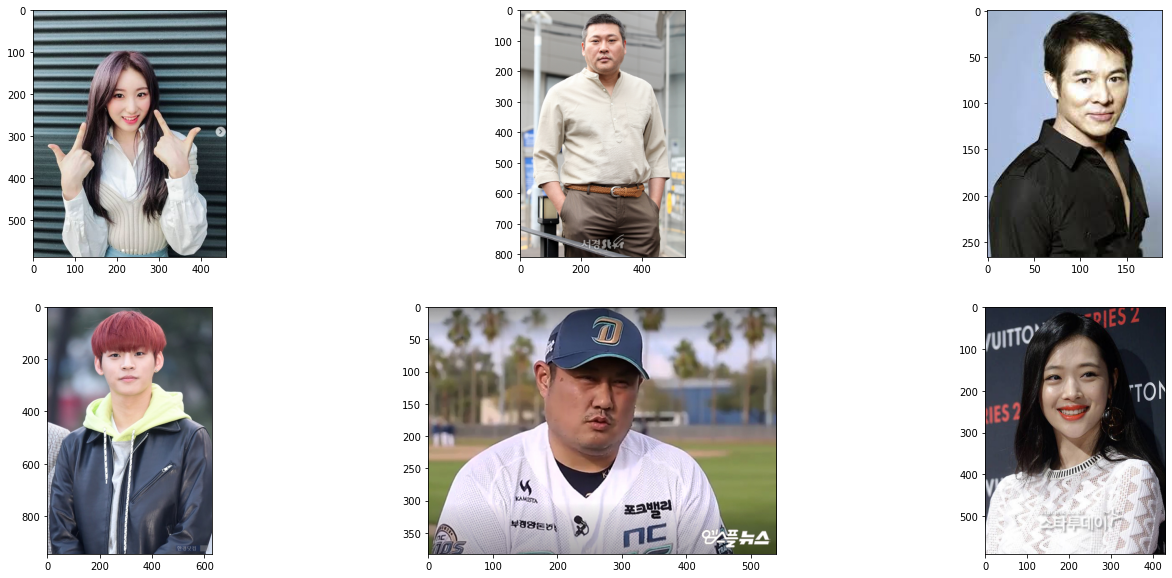

In [75]:
### 이미지들 로드해오기, 이미지 확인

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

[(92, 259, 199, 151)]


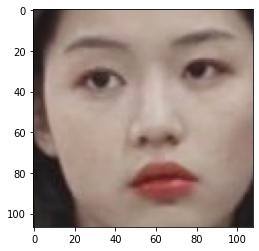

In [76]:
### 이미지 cropped 확인해보기

image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/전지현.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)

## Step2. 얼굴 영역 자르기
`get_cropped_face(image_file)`를 이용해서 이미지 자르기

시각화 시 필요한 이미지들 저장
```
from PIL import Image
face = get_gropped_face(image_path)
pillow_image = Image.fromarray(face)
pillow_image.save(path_to_save)
```

In [77]:
### 얼굴 영역을 구하는 함수 get_cropped_face

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

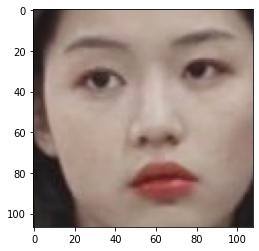

In [78]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/전지현.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

## Step3. 얼굴 영역의 임베딩 추출하기
얼굴 영역으로 잘린 이미지들을 face_recognition 을 사용해서 이미지를 불러오고 임베딩을 추출한다. 
다른 사람의 임베딩은 구분할 수 있게 따로 저장
- def get_face_embedding(face) : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수
- def get_face_embedding_dict(dir_path) : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수. images 디렉토리 안에 있는 모든 이미지 파일의 임베딩을 구해서 dict 구조에 담아 리턴하는 함수만들기. 딕셔너리의 각 엘리먼트는 `사람 이름:임베딩` 벡터로 한다. 

사용법은 다음과 같다.
```
embedding_dict = get_face_embedding_dict(dir_path):
embedding_dict['obama']  # obama.jpg의 얼굴임베딩 벡터
```

In [79]:
### 파일안에 이미지들 확인해보기

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['채연.jpg', '최무성.jpg', '이연걸.jpeg', '온앤오프효진.jpg', '최준석.jpg', '설리.jpeg', '효정.jpg', '피어스 브로스넌.jpg', '민니.jpg', '김희철.jpg', '김영삼.jpeg', '김남주.jpeg', '한기범.jpg', '첸.jpg', '방시혁.jpeg', '류현진.jpg', '기성용.jpg', '곽도원.jpg', '미미.jpg', '여자아이들수진.jpeg', '리사.jpg', '러블리즈지수.jpeg', '유지태.jpg', '온앤오프와이엇.jpg', '로제.jpg', '온앤오프라운.jpg', '존 파브르.jpeg', '크리스 에반스.jpg', '이광수.jpg', 'bush.jpeg', '잭 스페이더.jpeg', '김연우.jpeg', '슈가.jpg', '박찬호.jpg', '다니엘 크레이그.jpeg', '배성재.jpg', '김고은.jpeg', '정형돈.jpg', '야마다 타카유키.jpeg', '배성우.png', '유희열.jpeg', '트와이스모모.jpeg', '.ipynb_checkpoints', '이제훈.jpeg', '태용.jpeg', '트와이스쯔위.jpg', '이승철.jpeg', '주호민.jpeg', '이천수.jpg', '리아.jpg', '조원희.jpg', 'trump.jpg', '디오.jpeg', '장성호.jpeg', '정국.jpg', '노무현.jpeg', '유나.jpg', 'clinton.jpeg', '조이.jpg', '조승우.jpeg', '이경규.jpeg', '서장훈.jpg', '지호.jpg', '류승범.jpg', '지수.jpg', '차범근.jpeg', '박휘순.jpg', '아이린.jpeg', '하현우.jpg', '뷔.jpg', '브래들리 쿠퍼.jpg', '박성호.jpg', '김래원.jpeg', '정준하.jpg', '최민식.jpg', '김민재.jpeg', '제이콥 배털론.jpg', '김C.jpeg', '박찬욱.jpeg', '전소미.jpg', '카이.jpg', '공유.j

In [80]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수 get_face_embedding

image_file = os.path.join(dir_path, '전지현.jpg')
face = get_cropped_face(image_file)   


def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.15028198,  0.0395619 ,  0.07674189, -0.1018882 , -0.10066058,
        -0.06405841, -0.06045115, -0.12982026,  0.09882592, -0.10335785,
         0.21610096, -0.1110893 , -0.20983692, -0.04770026, -0.05790842,
         0.2293376 , -0.14505501, -0.15365431, -0.02329661,  0.0408905 ,
         0.11617219, -0.01083749, -0.00911807,  0.05797084, -0.09677434,
        -0.27988786, -0.11356603, -0.00119741, -0.02547482, -0.04801525,
        -0.03921026,  0.05589278, -0.21883893, -0.05523153,  0.00638026,
         0.12833256,  0.02289654, -0.14475696,  0.15192717,  0.00044937,
        -0.28802869,  0.07788032,  0.09258757,  0.23127377,  0.17706208,
        -0.00381634,  0.00952087, -0.16928987,  0.11531373, -0.18701315,
         0.04189296,  0.09193879,  0.071427  ,  0.02911029,  0.01569701,
        -0.13531874,  0.07825643,  0.15147831, -0.17071293, -0.00455577,
         0.10392582, -0.03381542,  0.0290477 , -0.17039351,  0.1939321 ,
         0.08472416, -0.11549316, -0.17112723,  0.1

In [81]:
### 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        image_path = os.path.join(dir_path, file)
        try:
            face = get_cropped_face(image_path)
            embedding = get_face_embedding(face)

            # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
            # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담김.
            if len(embedding) > 0:
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        except:
            continue
        
    return embedding_dict

In [82]:
### 확인

embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['제니']

array([-0.09244553,  0.03837719,  0.05014271, -0.10777834, -0.15058555,
       -0.07511918, -0.08935644, -0.09366933,  0.14542852, -0.14395326,
        0.18868886, -0.124952  , -0.15541607, -0.01747145, -0.07636162,
        0.22752777, -0.1461173 , -0.14963059, -0.00516256,  0.01251971,
        0.10750481, -0.00196706, -0.01433153,  0.07210942, -0.08644596,
       -0.31680322, -0.12652466, -0.08697721, -0.06842111, -0.09196598,
       -0.03684473,  0.0962809 , -0.20203528, -0.02339702,  0.00498143,
        0.13854793,  0.01763166, -0.11467473,  0.08973623, -0.00839028,
       -0.33128223,  0.04359194,  0.07579406,  0.21096085,  0.14381763,
       -0.02980241,  0.00463446, -0.11932796,  0.05649903, -0.12023606,
        0.00785373,  0.09599183,  0.03757802,  0.0431479 ,  0.00766044,
       -0.10845399,  0.10568126,  0.08344181, -0.1652364 , -0.00945019,
        0.15850049, -0.10817793,  0.00631167, -0.12296762,  0.18563123,
        0.11674833, -0.07491971, -0.22896339,  0.10020559, -0.16

## Step4. 모은 연예인들과 비교하기
자신의 얼굴 사진에서 추출한 임베딩 벡터들 간의 거리를 비교해 보고 가장 작은 연예인이 찾아보자.
`get_nearest_face(name, top=5)`
지금까지의 함수를 정리해보자.
- `def get_cropped_face(image_file)` : 이미지 파일에서 얼굴 영역을 가져오는 함수
- `def get_face_embedding(face)` : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수
- `def get_face_embedding_dict(dir_path)` : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수
- `def get_distance(name1, name2)` : 두 이미지(사람 이름) 사이의 임베딩 벡터 거리를 구하는 함수

In [83]:
### get_distance() 함수는 인자로 파일명의 사람 이름 2개를 받아서, 두 사람의 얼굴 임베딩 사이의 거리(L2 distance)를 구하는 형태입니다.

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('전지현', '제니')

0.4098283521578592

In [84]:
### name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 한다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('전지현')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('jennie') 라고 호출할 때 kimyojung와 jennie 사이의 임베딩 벡터 거리를 계산합니다.
sort_key_func('제니')

0.4098283521578592

In [87]:
nearst_list = {}

def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0:
            continue
        if sorted_faces[i]:
            nearst_list[sorted_faces[i][0]] = sort_key_func(sorted_faces[i][0])
            print("rank : {}, 이름: {}, 거리: {}".format(i, sorted_faces[i][0],sort_key_func(sorted_faces[i][0])))

In [88]:
### 나와 가장 닮은 사람은 누굴까요?
get_nearest_face('me1')

rank : 1, 이름: 전지현, 거리: 0.392475952948106
rank : 2, 이름: 온앤오프효진, 거리: 0.39705225503490155
rank : 3, 이름: 진, 거리: 0.4065085448955827
rank : 4, 이름: 박재범, 거리: 0.40773695610857247
rank : 5, 이름: 김고은, 거리: 0.4150321025403537


In [89]:
nearst_list

{'전지현': 0.392475952948106,
 '온앤오프효진': 0.39705225503490155,
 '진': 0.4065085448955827,
 '박재범': 0.40773695610857247,
 '김고은': 0.4150321025403537}